In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [133]:
cars=pd.read_csv(r"C:\Users\user\Downloads\car_age_price (1).csv")
cars

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [134]:
cars.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [135]:
cars.shape

(112, 2)

In [136]:
cars.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [137]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [138]:
cars.isnull().sum()

Year     0
Price    0
dtype: int64

# Visualizing The Data

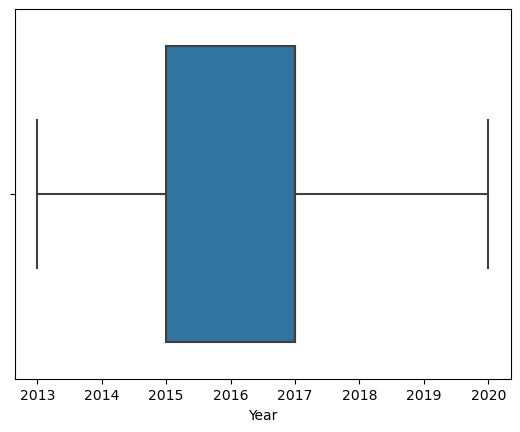

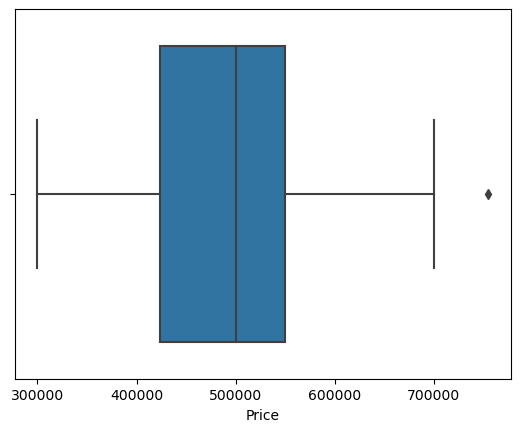

In [139]:
for i in cars:
    sns.boxplot(x=cars[i])
    plt.show()

# Outlier Removal

In [140]:
IQR=stats.iqr(cars.Price,interpolation='midpoint')
IQR

127500.0

In [141]:
Q1=cars.Price.quantile(0.25)
Q3=cars.Price.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(232500.0, 741250.0)

In [142]:
cars.loc[cars.Price<min_limit]

,Year,Price


In [143]:
cars.loc[cars.Price>max_limit]

,Year,Price
1,2019,755000


In [144]:
cars.loc[cars['Price']>max_limit,'Price']=np.median(cars.Price)
cars.loc[cars.Price>max_limit]

,Year,Price


# Regression Analysis

Linear Regression

In [145]:
cars.head()

,Year,Price
0,2018,465000
1,2019,500000
2,2019,700000
3,2018,465000
4,2018,465000


In [146]:
corr_matrix=cars.corr()

[]

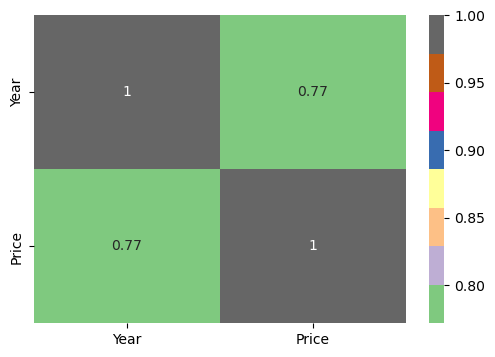

In [147]:
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='Accent')
plt.plot()

In [148]:
#classifying predictor and target
x=cars.drop(['Price'],axis=1)
y=cars['Price']

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [156]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [157]:
model=lr.fit(x_train,y_train)

In [158]:
predictions=model.predict(x_test)

In [159]:
from sklearn.metrics import mean_squared_error,r2_score

In [160]:
print('Mean squared error=',mean_squared_error(y_test,predictions))
print('R squared value=',r2_score(y_test,predictions))

Mean squared error= 3881491312.3659024
R squared value= 0.4326935668227986


Lasso Regression

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn import metrics

In [162]:
Cars=pd.read_csv(r"C:\Users\user\Downloads\car_age_price (1).csv")

In [163]:
print(Cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None


In [164]:
#classifying predictor and target
x=Cars.drop(['Price'],axis=1)
y=Cars['Price']

In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [184]:
Lasso_reg_model=Lasso()

In [185]:
Lasso_reg_model.fit(x_train,y_train)

Lasso()

In [186]:
training_data_pred=Lasso_reg_model.predict(x_test)

In [187]:
from sklearn.metrics import mean_squared_error,r2_score

In [188]:
error_score=metrics.r2_score(y_test,training_data_pred)
print('Mean squared error=',mean_squared_error(y_test,predictions))
print('R squared value=',r2_score(y_test,predictions))

Mean squared error= 3881491312.3659024
R squared value= 0.4326935668227986


# Prediction In 2022

In [189]:
x=Cars.drop(['Price'],axis=1)
y=Cars['Price']

In [190]:
predictions

array([590889.61984804, 501431.74734595, 546160.683597  , 546160.683597  ,
       546160.683597  , 411973.87484388, 501431.74734595, 546160.683597  ,
       590889.61984804, 590889.61984804, 322516.00234179, 501431.74734595,
       411973.87484388, 635618.55609909, 546160.683597  , 590889.61984804,
       322516.00234179, 411973.87484388, 501431.74734595, 501431.74734595,
       501431.74734595, 501431.74734595, 501431.74734595])

In [191]:
print('slope:%.2f'%lasso.coef_[0])

slope:42037.84


In [193]:
print('intercept:%.2f'%lasso.intercept_)

intercept:-84293954.53


In [204]:
slope=42037.84
intercept=-84293954.53    

In [205]:
def myfunc(x):
    return slope*x+intercept

In [206]:
price=myfunc(2022)

In [207]:
price

706557.9499999881